In [1]:
import requests
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df = pd.read_csv(r'C:\Users\Dorothy\OneDrive\Documents\Nairobi County Healthcare Accessibility\Nairobi-County-Accessibility-of-Health-Care\data\ehealth-kenya-facilities-download-21102015.csv')
nairobi_dataset = df[df['County'] == "Nairobi"]
nairobi_dataset.head()

,Facility Code,Facility Name,Province,County,District,Division,Type,Owner,Location,Sub Location,...,IPD,OPD,OUTREACH,PMTCT,RAD/XRAY,RHTC/RHDC,TB DIAG,TB LABS,TB TREAT,YOUTH
1,19310,St Jude's Huruma Community Health Services,Nairobi,Nairobi,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,13043,7Kr Mrs Health Centre,Nairobi,Nairobi,Langata,Lang'ata,Health Centre,Armed Forces,Mugumoini,Mugumoini,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,20346,AAR Adams Health Centre,Nairobi,Nairobi,Kibra,Woodly,Medical Clinic,Private Practice - General Practitioner,Woodly,Woodly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,12861,AAR City Centre Clinic,Nairobi,Nairobi,Starehe,Starehe,Medical Clinic,Private Enterprise (Institution),Central Business District,NaN,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,16796,AAR Clinic Sarit Centre (Westlands),Nairobi,Nairobi,Westlands,Parklands,Medical Clinic,Private Enterprise (Institution),Parklands,Upper Parklands,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# column names
df.columns.tolist()

['Facility Code',
 'Facility Name',
 'Province',
 'County',
 'District',
 'Division',
 'Type',
 'Owner',
 'Location',
 'Sub Location',
 'Description of Location',
 'Constituency',
 'Nearest Town',
 'Beds',
 'Cots',
 'Official Landline',
 'Official Fax',
 'Official Mobile',
 'Official Email',
 'Official Address',
 'Official Alternate No',
 'Town',
 'Post Code',
 'In Charge',
 'Job Title of in Charge',
 'Open 24 Hours',
 'Open Weekends',
 'Operational Status',
 'ANC',
 'ART',
 'BEOC',
 'BLOOD',
 'CAES SEC',
 'CEOC',
 'C-IMCI',
 'EPI',
 'FP',
 'GROWM',
 'HBC',
 'HCT',
 'IPD',
 'OPD',
 'OUTREACH',
 'PMTCT',
 'RAD/XRAY',
 'RHTC/RHDC',
 'TB DIAG',
 'TB LABS',
 'TB TREAT',
 'YOUTH']

In [5]:
# number of data points
print(f" Number of rows:  {df.shape[0]} \n Number of columns: {df.shape[1]} \n")

print("Narobi County Dataset: " )
print(f" Number of rows:  {nairobi_dataset.shape[0]} \n Number of columns: {nairobi_dataset.shape[1]} ")

 Number of rows:  10505 
 Number of columns: 50 

Narobi County Dataset: 
 Number of rows:  942 
 Number of columns: 50 


In [6]:
df.describe()

,Facility Code,Beds,Cots,Official Alternate No,ANC,BEOC,BLOOD,CAES SEC,CEOC,EPI,...,HCT,OPD,OUTREACH,PMTCT,RAD/XRAY,RHTC/RHDC,TB DIAG,TB LABS,TB TREAT,YOUTH
count,10505.000000,10418.000000,10428.000000,9.520000e+02,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,15726.711471,5.432905,0.744342,6.695277e+08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3246.324955,29.862656,11.332022,5.568178e+08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,10001.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,12957.000000,0.000000,0.000000,7.138962e+08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,15702.000000,0.000000,0.000000,7.227692e+08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,18569.000000,1.000000,0.000000,7.278981e+08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,21281.000000,1455.000000,1000.000000,7.382217e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
nairobi_dataset.describe()

,Facility Code,Beds,Cots,Official Alternate No,ANC,BEOC,BLOOD,CAES SEC,CEOC,EPI,...,HCT,OPD,OUTREACH,PMTCT,RAD/XRAY,RHTC/RHDC,TB DIAG,TB LABS,TB TREAT,YOUTH
count,942.000000,942.000000,942.000000,1.570000e+02,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,16799.744161,7.787686,1.152866,6.498035e+08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3129.912948,58.966655,15.196691,5.890122e+08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,12861.000000,0.000000,0.000000,2.222575e+06,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,13112.250000,0.000000,0.000000,7.103701e+08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,18346.000000,0.000000,0.000000,7.225878e+08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,19492.750000,1.000000,0.000000,7.288983e+08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,21281.000000,1455.000000,427.000000,7.329109e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:

def get_value_at_max(dataframe, column_max, column_extract):
    max_index = dataframe[column_max].idxmax()
    value_at_max = dataframe.at[max_index, column_extract]
    return value_at_max

nation_largest_hospital = get_value_at_max(df, 'Beds', 'Facility Name')
nation_largest_maternity_hospital = get_value_at_max(df, 'Cots', 'Facility Name')
nairoby_largest_maternity_hospital = get_value_at_max(nairobi_dataset, 'Cots', 'Facility Name')
print( f"The country's largest hospital by number of beds is :{nation_largest_hospital} \nHospital with the most number of cots in the country  is :{nation_largest_maternity_hospital} \nHospital with the most number of cots in Nairobi County is : {nairoby_largest_maternity_hospital}" )
#    print("The country's largest maternity hospital by number of beds is :", nation_largest_maternity_hospital) 
# "Nairobu's largest maternity hospital by number of beds is :", nation_largest_maternity_hospital)

The country's largest hospital by number of beds is :Kenyatta National Hospital 
Hospital with the most number of cots in the country  is :Njerian Dispensary 
Hospital with the most number of cots in Nairobi County is : Kenyatta National Hospital


In [9]:
#number of unique values per column
unique_values=pd.DataFrame(nairobi_dataset.apply(lambda x: len(x.value_counts(dropna=False)), axis=0), 
                           columns=['Unique Value Count']).sort_values(by='Unique Value Count', ascending=True)
unique_values

,Unique Value Count
YOUTH,1
TB TREAT,1
ANC,1
BEOC,1
BLOOD,1
CAES SEC,1
CEOC,1
EPI,1
HCT,1
GROWM,1


In [10]:
# the percentage of missing values in the nairobi dataset
def missing_values(df):    
    totalCells = df.size   
    missingCount = df.isnull().sum()
    totalMissing = missingCount.sum()    
    print("There are a total of", totalCells, "datapoints")
    print("The dataset contains", totalMissing, "missing values.")
    print(round(((totalMissing/totalCells) * 100), 2), "%", "of the datapoints are missing")

missing_values(nairobi_dataset)

There are a total of 47100 datapoints
The dataset contains 26633 missing values.
56.55 % of the datapoints are missing


In [11]:
def columns_with_most_missing_values(dataframe, num_columns): 
     # Calculate the percentage of missing values in each column
    missing_percentage = (dataframe.isnull().sum() / len(dataframe)) * 100    
    # Sort columns by their missing percentage in descending order
    sorted_columns = missing_percentage.sort_values(ascending=False)    
    # Get the top 'num_columns' columns with the most missing values
    columns_most_missing = sorted_columns.head(num_columns)    
    return columns_most_missing

columns_most_missing = columns_with_most_missing_values(nairobi_dataset, 25)
print("Columns with the most missing values and percentage of missing values:\n",columns_most_missing)

Columns with the most missing values and percentage of missing values:
 YOUTH                    100.000000
CEOC                     100.000000
GROWM                    100.000000
BEOC                     100.000000
OPD                      100.000000
OUTREACH                 100.000000
BLOOD                    100.000000
HCT                      100.000000
CAES SEC                 100.000000
PMTCT                    100.000000
RAD/XRAY                 100.000000
RHTC/RHDC                100.000000
EPI                      100.000000
TB DIAG                  100.000000
TB LABS                  100.000000
TB TREAT                 100.000000
ANC                      100.000000
Official Fax              97.983015
C-IMCI                    92.356688
ART                       88.428875
Official Alternate No     83.333333
Official Landline         79.087049
Official Email            76.433121
HBC                       73.460722
FP                        70.276008
dtype: float64


Majority of the above columns are fields that highlight the type of tests offered by each hospital. Since most of them are empty, these columns will be removed from the dataset. 

In [12]:
def remove_columns_with_high_missing_values(dataframe, threshold=70):
    missing_percentage = (dataframe.isnull().sum() / len(dataframe)) * 100        
    columns_to_remove = missing_percentage[missing_percentage > threshold].index      
    dataframe_filtered = dataframe.drop(columns=columns_to_remove)    
    return dataframe_filtered

nairobi_dataset_filtered = remove_columns_with_high_missing_values(nairobi_dataset, threshold=70)
print("DataFrame after removing columns with over 70% missing values: ",nairobi_dataset_filtered.shape)


DataFrame after removing columns with over 70% missing values:  (942, 25)


In [13]:
missing_values(nairobi_dataset_filtered)

There are a total of 23550 datapoints
The dataset contains 4389 missing values.
18.64 % of the datapoints are missing


By removing columns with removing columns with over 70% missing values, the number of columns have reduced by 50% and the missing datapoints reduced from 56.55% to 18.64%. 

#### Observations from Initial Analysis

1. There are a total of 10505 facilities countrywide and 942 facilities in Nairobi County.
2. On average there are approximately 7 beds per hospital within Nairobi which is higher than the national average of 5 beds per hospital.
3. Kenyatta National Hospital has the most number of beds(1455) and cots(427) within Nairobi County, while Njerian Dispensary in Bomet County has the most number of cots (1000)country wide.



### Exploratory Data Analysis

An analysis on the distribution of hospitals in Nairobi County by geographical location, Ownership, Quality of services, Skills of personnel and Operationality


In [14]:
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df: pd.DataFrame, column: str, title: str) -> None:
    plt.figure(figsize=(12, 7)) 
    sorted_counts = df[column].value_counts().sort_values(ascending=True)  
    sns.countplot(data=df, x=column, order=sorted_counts.index) 
    plt.title(title, size=20, fontweight='bold') 
    plt.xticks(rotation=45, ha='right') 
    for index, value in enumerate(sorted_counts):
        plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=10)
    plt.show() 

def plot_stacked_bar(df: pd.DataFrame, x_col: str, y_col: str, hue: str, title: str) -> None:
    plt.figure(figsize=(20, 7))
    sns.barplot(data=df, x=x_col, y=y_col, hue=hue, palette='viridis')
    plt.title(title, size=20)
    plt.xticks(rotation=45, ha='right', fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc='upper right')  # Add legend for hue
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(20, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.xticks(rotation=45, ha='right') 
    plt.show()

def correlation(df:pd.DataFrame):
    corr=df.corr()
    matrix=np.triu(df.corr())
    sns.heatmap(corr,annot=True,square=True,mask=matrix)
    fig=plt.gcf()
    figsize=fig.get_size_inches()
    fig.set_size_inches(figsize*4)
    plt.show()

Distibution of facilities within Nairobi

In [15]:
nairobi_dataset_filtered.columns

Index(['Facility Code', 'Facility Name', 'Province', 'County', 'District',
       'Division', 'Type', 'Owner', 'Location', 'Sub Location',
       'Description of Location', 'Constituency', 'Nearest Town', 'Beds',
       'Cots', 'Official Mobile', 'Official Address', 'Town', 'Post Code',
       'In Charge', 'Job Title of in Charge', 'Open 24 Hours', 'Open Weekends',
       'Operational Status', 'IPD'],
      dtype='object')

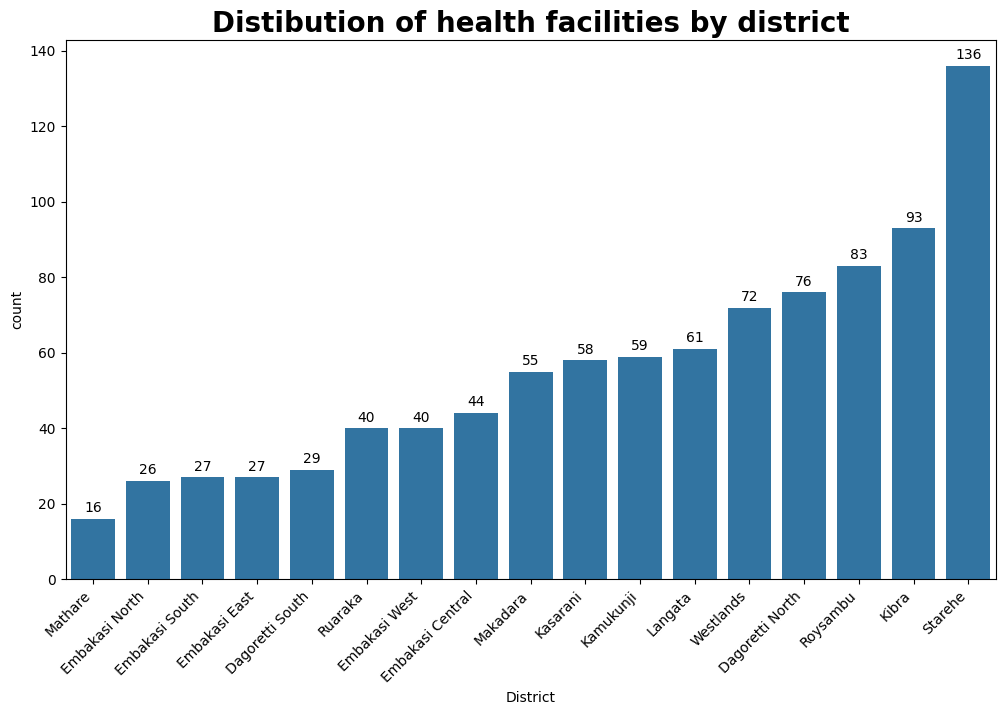

In [16]:
plot_count(nairobi_dataset_filtered, "District", "Distibution of health facilities by district") 

Districts with the least number of facilities: Mathare, Embakasi North,South and East and Dagoretti South, each having less than 30 facilities.
Districts with the most number of facilities: Westlands, Dagoretti North, Roysambu, Kibra and Starehe

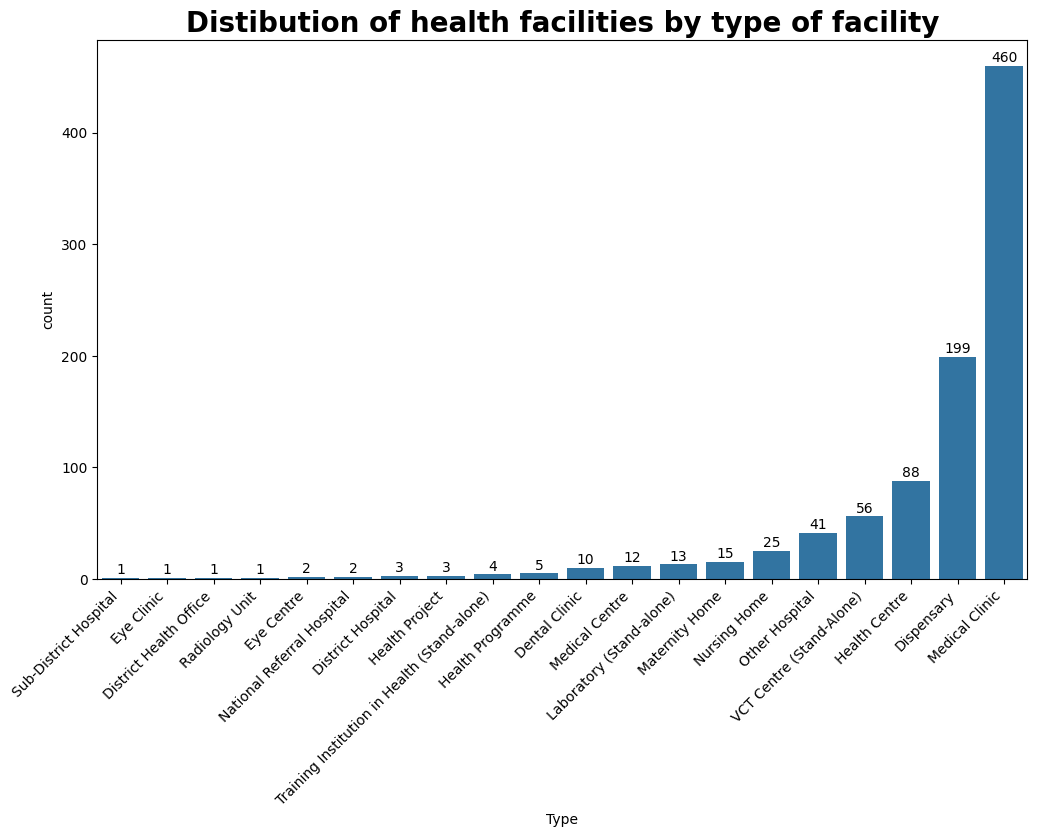

In [17]:
plot_count(nairobi_dataset_filtered, "Type", "Distibution of health facilities by type of facility") 

Majority of the facilities are Medical Clinics

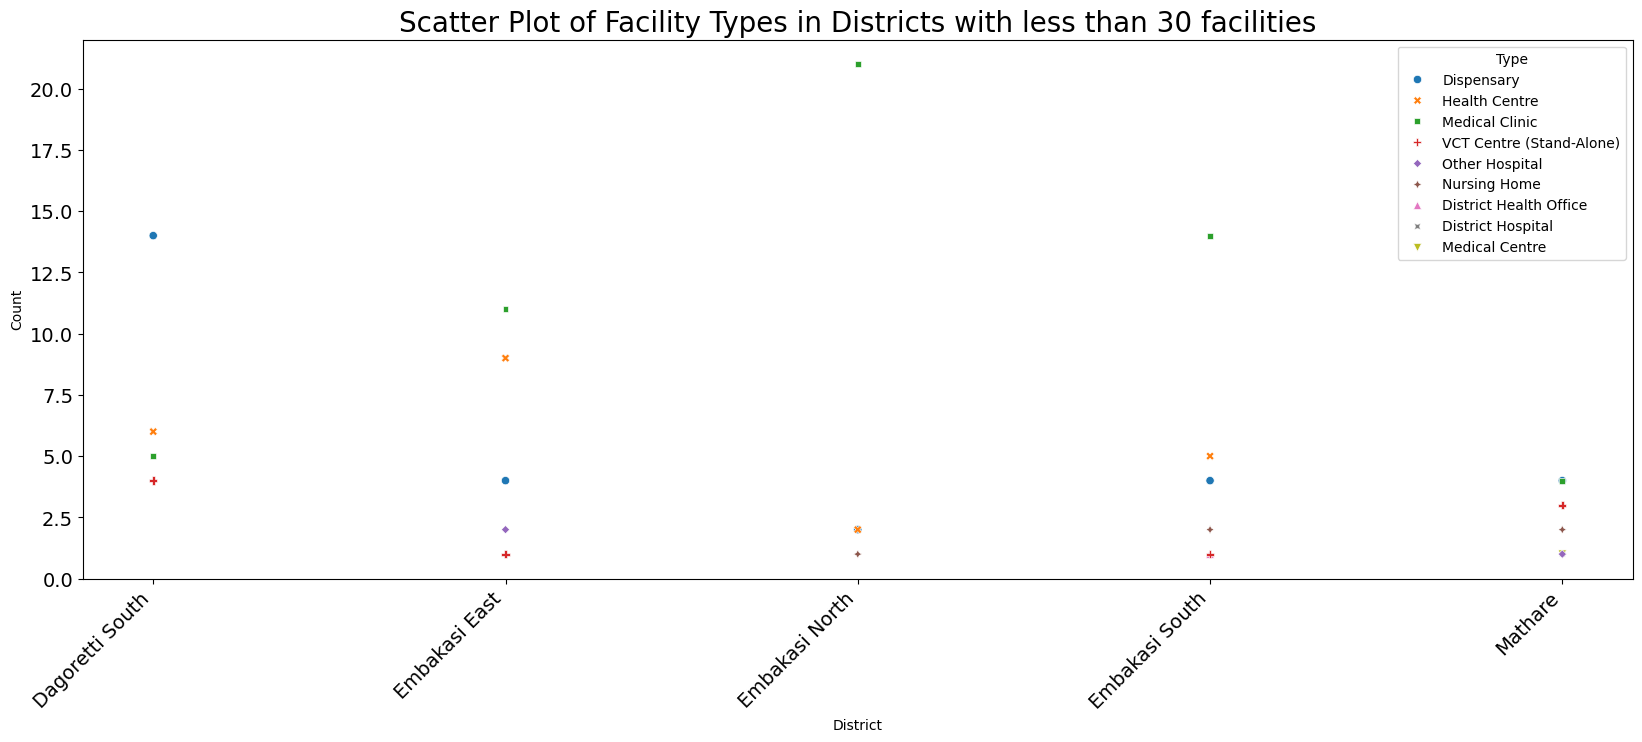

In [18]:
def districts_less_than_30(df):
    facility_count_per_district = df['District'].value_counts()
    districts_less_than_30 = facility_count_per_district[facility_count_per_district < 30].index.tolist()
    df_less_than_30 = df[df['District'].isin(districts_less_than_30)]
    distribution_by_type = df_less_than_30.groupby(['District', 'Type']).size().reset_index(name='Count')
    return distribution_by_type

distribution_by_type=districts_less_than_30(nairobi_dataset_filtered)

plot_scatter(distribution_by_type, 'District', 'Count', 'Scatter Plot of Facility Types in Districts with less than 30 facilities',  'Type',  'Type' )


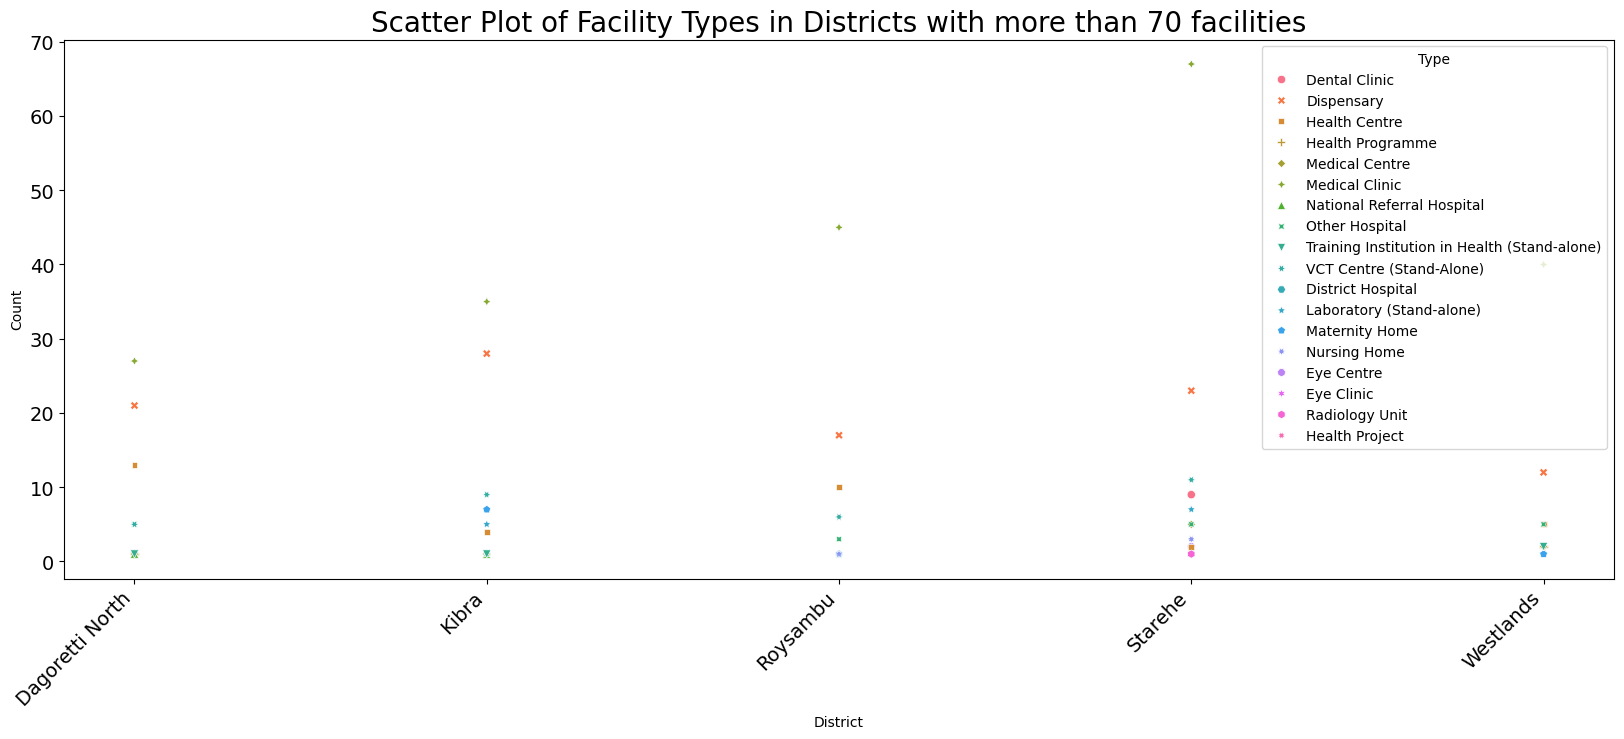

In [19]:
def districts_more_than_70(df):
    facility_count_per_district = df['District'].value_counts()
    districts_more_than_70 = facility_count_per_district[facility_count_per_district > 70].index.tolist()
    df_less_than_30 = df[df['District'].isin(districts_more_than_70)]
    distribution_by_type = df_less_than_30.groupby(['District', 'Type']).size().reset_index(name='Count')
    return distribution_by_type

distribution_by_type=districts_more_than_70(nairobi_dataset_filtered)

plot_scatter(distribution_by_type, 'District', 'Count', 'Scatter Plot of Facility Types in Districts with more than 70 facilities',  'Type',  'Type' )

## Population Statistics

In [20]:
# data extracted using api
population_by_sex = "https://openafrica.net/api/3/action/datastore_search?resource_id=f1fca3c3-af10-4b55-b33a-95e8fbbd8dc2&q=nairobi"
household_size = "https://openafrica.net/api/3/action/datastore_search?resource_id=111a3d9d-c676-4d5a-9600-d5acb1250b87&q=nairobi"
landarea_populationdensity = "https://openafrica.net/api/3/action/datastore_search?resource_id=17b4b55a-0b2d-40c2-8e30-27a5be21f42a&q=nairobi"



def nairobi_population_by_sex(url):
    response = requests.get(url)
    data = response.json()      
    # Extracting relevant information into a list of dictionaries
    records = []
    for record in data['result']['records']:
        record_dict = {
            'Name': record.get('name', 0),
            'Male': record.get('Male', 0),
            'Female': record.get('Female', 0),
            'Intersex': record.get('Intersex', 0),
            'Total': record.get('Total', 0)
        }
        records.append(record_dict)    
   
    population_df = pd.DataFrame(records)
    return population_df


def nairobi_household_size(url):
    response = requests.get(url)
    data = response.json()
    records = []
    for record in data['result']['records']:
        record_dict={
            'County': record.get('name',0),
            'Population':record.get('Population'),
            'Households':record.get('No.of Households',0)
        }
        records.append(record_dict)
    
    household_size_df=pd.DataFrame(records)
    return household_size_df
    


def nairobi_pop_density(url):
    response = requests.get(url)
    data = response.json()
    records =[]
    for record in data['result']['records']: 
        record_dict = {
            'County' : record.get('National/ County',0),
            'Population':record.get('Population',0),
            'Land Area':record.get('Land Area (Sq. Km)',0),
            'Population Density':record.get('Population Density (No. per Sq. Km)',0)
        }

    records.append(record_dict)

    nairobi_pop_density_df = pd.DataFrame(records)
    return nairobi_pop_density_df

In [21]:
nairobi_population = nairobi_population_by_sex(population_by_sex)
nairobi_household_size = nairobi_household_size(household_size)
nairobi_pop_density = nairobi_pop_density(landarea_populationdensity)

In [22]:
nairobi_population

,Name,Male,Female,Intersex,Total
0,Nairobi City,2192452,2204376,245,4397073


In [23]:
nairobi_household_size

,County,Population,Households
0,Nairobi,4337080,1506888


In [24]:
nairobi_pop_density

,County,Population,Land Area,Population Density
0,Nairobi City,4397073,703.9,6247


1. Nairobi has a population of 4.3M people, 50.1 % being females.
2. There are 1.5 M households, meaning about 3 people in each household
3. With an area of 703.9 square km, there are 6200 individuals per square km, showing a high population density

### Distribution of population by Sub Counties in Nairobi County

In [25]:
df = pd.read_csv(r"C:\Users\Dorothy\OneDrive\Documents\Nairobi County Healthcare Accessibility\Nairobi-County-Accessibility-of-Health-Care\data\distribution-of-population-by-age-sex-county-and-sub-county-kenya-2019.csv")
nairobi_population_dataset = df[df['county'] == "NAIROBI"]
nairobi_population_dataset.to_csv("Nairobi Population by Age and Sex.csv")

In [26]:
def population_by_subcounty(df):
    total_rows = df[df['Age'] == 'Total']
    result_df = total_rows[['sub-county', 'Total']].copy()
    result_df.columns = ['Sub-county', 'Total']  
    result_df = result_df[result_df['Sub-county'] != 'ALL']    
    result_df = result_df.reset_index(drop=True)
    result_df = result_df.sort_values('Total')
    return result_df

population_by_subcounty=population_by_subcounty(nairobi_population_dataset)
# population_by_subcounty

fig = px.bar(population_by_subcounty, x='Sub-county', y='Total',title="Population by sub-county")
fig.show()

1. Kibra, Makadara, Langata and Mathare Sub-counties are the least populated
2. Embakasi, Kasarani,Njiru and Dagoretti Sub-counties are the most populated

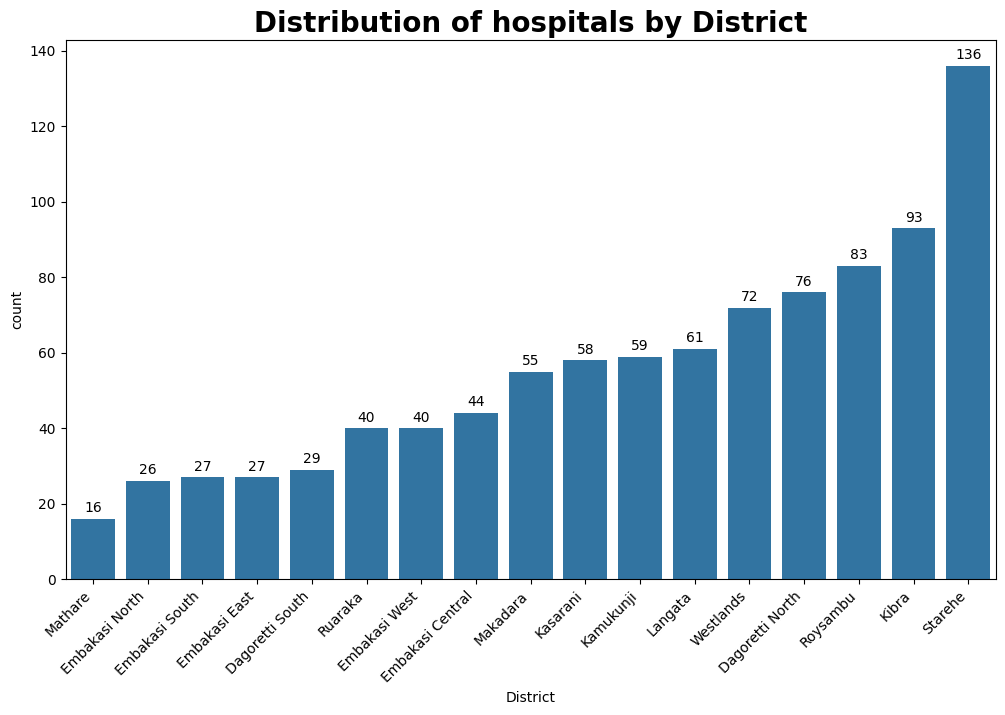

In [27]:
 plot_count(nairobi_dataset_filtered, "District", "Distribution of hospitals by District")


Distribution of age 

In [41]:
def age_distributions(df):   
    age_groups = df[df['Age'].isin(['0 - 4','5-9',"10 -14","15-19","20-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79","80-84","85-89","90-94","95-99","100+"])]
    age_groups = age_groups.reset_index(drop=True)
    return age_groups

age_distribution=age_distributions(nairobi_population_dataset)
nairobi_age_distribution=age_distribution[age_distribution["sub-county"] == "ALL"]
# nairobi_age_distribution.set_index('Age', inplace=True)

nairobi_age_distribution.to_csv("age_distribution.csv")
nairobi_age_distribution

In [29]:

nairobi_age_distribution['Total'] = pd.to_numeric(nairobi_age_distribution['Total'], errors='coerce')

fig = px.bar(nairobi_age_distribution, x='Age', y='Total',title="Distribution of Age in Nairobi County")
fig.show()

C:\Users\Dorothy\AppData\Local\Temp\ipykernel_9192\3827968912.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
# age distribution by subcounty
# age_distribution['Total'] = pd.to_numeric(nairobi_age_distribution['Total'], errors='coerce')
# age_distribution

def group_by_age_and_total(subcounty_value, df):
    subcounty_data = df[df['sub-county'] == subcounty_value]
    subcounty_data = subcounty_data[['sub-county','Age','Total']].copy()
    subcounty_data.columns = ['Sub-county', 'Age','Total'] 
    return subcounty_data


# age distribution in densley populated subcounties
subcounty_value = 'DAGORETTI' 
# 'EMBAKASI', 'KAMUKUNJI', 'KASARANI', 'KIBRA', "LANG'ATA", 'MAKADARA', 'MATHARE', 'NJIRU', 'STAREHE', 'WESTLANDS']
result = group_by_age_and_total(subcounty_value, nairobi_population_dataset)

age_distribution_per_subcounty=age_distributions(result)
age_distribution_per_subcounty['Total']=age_distribution_per_subcounty['Total'].astype(str).astype(int)

fig = px.bar(age_distribution_per_subcounty, x='Age', y='Total',title="Distribution of Age in Dagoretti County" )
fig.show()





In [31]:
subcounty_value = 'EMBAKASI' 

result = group_by_age_and_total(subcounty_value, nairobi_population_dataset)

age_distribution_per_subcounty=age_distributions(result)
age_distribution_per_subcounty['Total']=age_distribution_per_subcounty['Total'].astype(str).astype(int)

fig = px.bar(age_distribution_per_subcounty, x='Age', y='Total',title="Distribution of Age in Embakasi County" )
fig.show()

In [32]:
subcounty_value = 'NJIRU' 
# 'EMBAKASI', 'KAMUKUNJI', 'KASARANI', 'KIBRA', "LANG'ATA", 'MAKADARA', 'MATHARE', 'NJIRU', 'STAREHE', 'WESTLANDS']
result = group_by_age_and_total(subcounty_value, nairobi_population_dataset)

age_distribution_per_subcounty=age_distributions(result)
age_distribution_per_subcounty['Total']=age_distribution_per_subcounty['Total'].astype(str).astype(int)

fig = px.bar(age_distribution_per_subcounty, x='Age', y='Total',title="Distribution of Age in Njiru County" )
fig.show()

In [33]:
subcounty_value = 'KASARANI' 
# 'EMBAKASI', 'KAMUKUNJI', 'KASARANI', 'KIBRA', "LANG'ATA", 'MAKADARA', 'MATHARE', 'NJIRU', 'STAREHE', 'WESTLANDS']
result = group_by_age_and_total(subcounty_value, nairobi_population_dataset)

age_distribution_per_subcounty=age_distributions(result)
age_distribution_per_subcounty['Total']=age_distribution_per_subcounty['Total'].astype(str).astype(int)

fig = px.bar(age_distribution_per_subcounty, x='Age', y='Total',title="Distribution of Age in Kasarani County" )
fig.show()

Age distribution in sparsely populated areas

In [34]:
subcounty_value = 'KIBRA' 
# 'EMBAKASI', 'KAMUKUNJI', 'KASARANI', 'KIBRA', "LANG'ATA", 'MAKADARA', 'MATHARE', 'NJIRU', 'STAREHE', 'WESTLANDS']
result = group_by_age_and_total(subcounty_value, nairobi_population_dataset)

age_distribution_per_subcounty=age_distributions(result)
age_distribution_per_subcounty['Total']=age_distribution_per_subcounty['Total'].astype(str).astype(int)

fig = px.bar(age_distribution_per_subcounty, x='Age', y='Total',title="Distribution of Age in Kibra County" )
fig.show()

In [35]:
subcounty_value = 'MAKADARA' 
# 'EMBAKASI', 'KAMUKUNJI', 'KASARANI', 'KIBRA', "LANG'ATA", 'MAKADARA', 'MATHARE', 'NJIRU', 'STAREHE', 'WESTLANDS']
result = group_by_age_and_total(subcounty_value, nairobi_population_dataset)

age_distribution_per_subcounty=age_distributions(result)
age_distribution_per_subcounty['Total']=age_distribution_per_subcounty['Total'].astype(str).astype(int)

fig = px.bar(age_distribution_per_subcounty, x='Age', y='Total',title="Distribution of Age in Makadara County" )
fig.show()

In [36]:
subcounty_value = 'MATHARE' 
# 'EMBAKASI', 'KAMUKUNJI', 'KASARANI', 'KIBRA', "LANG'ATA", 'MAKADARA', 'MATHARE', 'NJIRU', 'STAREHE', 'WESTLANDS']
result = group_by_age_and_total(subcounty_value, nairobi_population_dataset)

age_distribution_per_subcounty=age_distributions(result)
age_distribution_per_subcounty['Total']=age_distribution_per_subcounty['Total'].astype(str).astype(int)

fig = px.bar(age_distribution_per_subcounty, x='Age', y='Total',title="Distribution of Age in Mathare County" )
fig.show()

In [37]:
subcounty_value = "LANG'ATA"
# 'EMBAKASI', 'KAMUKUNJI', 'KASARANI', 'KIBRA', "LANG'ATA", 'MAKADARA', 'MATHARE', 'NJIRU', 'STAREHE', 'WESTLANDS']
result = group_by_age_and_total(subcounty_value, nairobi_population_dataset)

age_distribution_per_subcounty=age_distributions(result)
age_distribution_per_subcounty['Total']=age_distribution_per_subcounty['Total'].astype(str).astype(int)

fig = px.bar(age_distribution_per_subcounty, x='Age', y='Total',title="Distribution of Age in Langata County" )
fig.show()

Population Densities per Subcounty

In [38]:
df = pd.read_csv(r"C:\Users\Dorothy\OneDrive\Documents\Nairobi County Healthcare Accessibility\Nairobi-County-Accessibility-of-Health-Care\data\distribution-of-population-by-land-area-density-and-sub-county-nairobi.csv")
population_densities = df[df['Sub County'] != "NAIROBI CITY"]
population_densities.to_csv("Population Densities in Nairobi Subcounties.csv")
population_densities=population_densities.sort_values('Population Density')

In [39]:
fig = px.bar(population_densities, x='Sub County', y='Population Density',title="Population Densities in Sub Counties" )
fig.show()

There is quite a big disparity in population distribution with Mathare having approximately 68000 people per square kilometer and Lang'ata having 910 people per square kilometer